<a href="https://colab.research.google.com/github/mittal-aman7/Naive-Bayes-Classifier/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
# import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rotten totmatoes/rt_reviews.csv', encoding='latin-1')

In [ ]:
df.head()

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...


In [ ]:
df.shape

(480000, 2)

#EDA

Text(0.5, 0, 'Freshness')

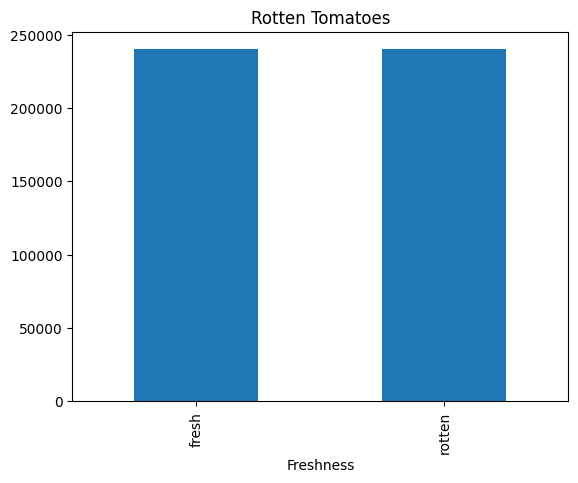

In [ ]:
axis = df['Freshness'].value_counts().plot(kind='bar', title='Rotten Tomatoes')
axis.set_xlabel('Freshness')

## Basic NLTK

In [ ]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

In [ ]:
# example = df['Review'][1000]
# exp_freshness = df['Freshness'][1000]
# print(exp_freshness,example)

In [ ]:
# token = nltk.word_tokenize(example)
# token

In [ ]:
# tags = nltk.pos_tag(token)
# tags

In [ ]:
# entity = nltk.chunk.ne_chunk(tags)
# entity.pprint()

## VADER Sentiment Scoring
stop words are also removed

In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# from tqdm.notebook import tqdm

In [ ]:
# from tkinter.constants import SE
# sia = SentimentIntensityAnalyzer()

## check the polarity of the test on example

In [ ]:
# sia.polarity_scores(example)
# sia.polarity_scores('I am so happy')

In [ ]:
# sia.polarity_scores('This is bad to do')

In [ ]:
# print(sia.polarity_scores(example))
# print(exp_freshness)

In [ ]:
# # run polarity score on the whole dataset
# res = {}
# for i, row in tqdm(df.iterrows(), total = len(df)):
#   text = row['Review']
#   res[i] = sia.polarity_scores(text)

In [ ]:
# vaders = pd.DataFrame(res).T

In [ ]:
# vaders.head()

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

In [ ]:
# # Download the NLTK stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words("english"))

## Stemming and splitting data

In [ ]:
# Shuffle the data
df = df.sample(frac=1, random_state=42)

# Define the proportions for train, test, and development sets
train_ratio = 0.8
test_ratio = 0.1
dev_ratio = 0.1

# Calculate the number of samples for each set
num_samples = df.shape[0]
num_train = int(num_samples * train_ratio)
num_test = int(num_samples * test_ratio)
num_dev = num_samples - num_train - num_test

# Split the data into train, test, and development sets
train_df = df.iloc[:num_train, :]
test_df = df.iloc[num_train:num_train + num_test, :]
dev_df = df.iloc[num_train + num_test:, :]

# Reset the index for each set
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
dev_df.reset_index(drop=True, inplace=True)

# slicing it for faster run
train_df = train_df.iloc[:24000]
test_df = test_df.iloc[:24000]
dev_df = dev_df.iloc[:24000]

# Print the shapes of the resulting sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("Development set shape:", dev_df.shape)


Train set shape: (24000, 2)
Test set shape: (24000, 2)
Development set shape: (24000, 2)


In [ ]:
def word_freq(text, freshness):
  word_list = text.split()
  for word in word_list():
    word_count = word_list.count(word)

In [ ]:
# Remove the filler words from the train dataset
filler_words = ['a', 'its',
    'an', 'the', 'and', 'but', 'or', 'so', 'as', 'at', 'by', 'for', 'from',
    'in', 'is', 'it', 'of', 'on', 'to', 'with', 'up', 'over', 'off', 'down',
    'about', 'after', 'before', 'between', 'through', 'under', 'against', 'around',
    'above', 'below', 'near', 'beside', 'beyond', 'during', 'onto', 'upon', 'out',
    'throughout', 'till', 'since', 'via', 'within', 'without', 'among', 'unless',
    'when', 'whereas', 'wherever', 'whenever', 'although', 'unless', 'when',
    'whenever', 'whereas', 'although', 'though', 'after', 'because', 'since', 'until',
    'unless', 'whereas', 'while', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me',
    'him', 'her', 'us', 'them', 'myself', 'yourself', 'himself', 'herself', 'itself',
    'ourselves', 'yourselves', 'themselves', 'this', 'that', 'these', 'those', 'which',
    'who', 'whom', 'whose', 'what', 'am', 'are', 'was', 'were', 'be', 'being', 'been',
    'have', 'has', 'had', 'do', 'does', 'did', 'will', 'shall', 'would', 'should', 'can',
    'could', 'may', 'might', 'must', 'ought', 'need', 'dare', 'used', 'let', 'also',
    'besides', 'furthermore', 'moreover', 'however', 'nevertheless', 'nonetheless',
    'still', 'therefore', 'thus', 'then', 'next', 'finally', 'otherwise', 'where', "it's"
]


def remove_filler_words(sentence):
    words = sentence.split()
    filtered_sentence = ' '.join(word for word in words if word.lower() not in filler_words)
    return filtered_sentence

In [ ]:
# Create an empty DataFrame
filetered_train_data = pd.DataFrame()

for index, sentence in train_df.iterrows():
  # print(sentence['Review'])filetered_train_data.loc[index,'Freshness', 'Review'] = [sentence['Freshness'], (remove_filler_words(sentence['Review']))]
  # print(sentence['Freshness'])
  filetered_train_data.loc[index, 'Freshness'] = sentence['Freshness']
  filetered_train_data.loc[index, 'Review'] = remove_filler_words(sentence['Review'])


filetered_train_data.head()

,Freshness,Review
0,fresh,"Guardians Galaxy first-class, Grade-A space ad..."
1,rotten,"while, Life Aquatic gets mileage quirkiness pr..."
2,rotten,Director Ken Scott stresses movie's dude-centr...
3,fresh,More snapshot full blown insight into either V...
4,fresh,immigrant experience takes blacker-than-black ...


In [ ]:
# def word_occurrence_df(df):
#     # Create an empty dictionary to store word occurrences
#     word_occurrences = {}
#     word_occurrences['word'] = []
#     word_occurrences['fresh']=[]
#     word_occurrences['rotten'] = []
#     # word_occurrence_categories = {}
#     # Iterate over each row in the DataFrame
#     for index, row in df.iterrows():
#         # Split the sentence into words
#         words = row['Review'].split()
#         for word in words:
#           word_count = words.count(word)
#         # Update the word occurrences dictionary
#           if word in word_occurrences['word']:
#                 word_occurrences[word] += 1
#           else:
#                 word_occurrences[word] = 1
#     # Create a DataFrame from the word occurrences dictionary
#     word_occurrence_df = pd.DataFrame(list(word_occurrences.items()), columns=['Word', 'Occurrence'])
#     # Sort the DataFrame by occurrence in descending order
#     word_occurrence_df = word_occurrence_df.sort_values(by='Occurrence', ascending=False)
#     # Reset the index of the DataFrame
#     word_occurrence_df = word_occurrence_df.reset_index(drop=True)
#     return word_occurrence_df


In [ ]:
def word_occurrence_df(train_df):
    # Initialize an empty dictionary to store the word occurrences
    word_occurrences_dict = {}
    
    # Iterate through each row in the train_df DataFrame
    for index, row in train_df.iterrows():
        review = row["Review"]
        freshness = row["Freshness"]
        
        # Split the review text into words
        words = review.split()
        
        # Count the occurrences of each word in the words list
        for word in words:
            if word not in word_occurrences_dict:
                word_occurrences_dict[word] = {"word": word, "fresh": 0, "rotten": 0}
            if freshness == "fresh":
                word_occurrences_dict[word]["fresh"] += 1
            elif freshness == "rotten":
                word_occurrences_dict[word]["rotten"] += 1
    
    # Convert the dictionary to a DataFrame
    word_occurrences_df = pd.DataFrame.from_dict(word_occurrences_dict, orient="index")
    
    # Reset the index
    word_occurrences_df.reset_index(drop=True, inplace=True)
    
    return word_occurrences_df


In [ ]:
word_occurrence_df = word_occurrence_df(filetered_train_data)

In [ ]:
word_occurrence_df

,word,fresh,rotten
0,Guardians,7,3
1,Galaxy,4,1
2,"first-class,",1,0
3,Grade-A,1,0
4,space,29,29
...,...,...,...
61011,Suffragette,0,1
61012,mini-series,0,1
61013,Sand,1,0
61014,dolefully,1,0


In [ ]:
total_word_fresh = 0
total_word_rotten = 0

for i, sen in word_occurrence_df.iterrows():
  total_word_fresh += sen['fresh']
  total_word_rotten += sen['rotten']  

total_words = total_word_fresh + total_word_rotten

In [ ]:
print(f'fresh : {total_word_fresh} rotten : {total_word_rotten} total : {total_words}')

fresh : 164025 rotten : 161454 total : 325479


In [ ]:
prob_fresh = total_word_fresh/ total_words
prob_rotten = total_word_rotten/ total_words
print(f'prob of fresh : {prob_fresh} prob of rotten {prob_rotten}')

prob of fresh : 0.503949563566313 prob of rotten 0.49605043643368696


In [ ]:
prob_words = {}
for i, row in word_occurrence_df.iterrows():
  prob_words[row['word']] = (row['fresh'] + row['rotten']) / total_words

print(prob_words)

{'Guardians': 3.072394839605627e-05, 'Galaxy': 1.5361974198028136e-05, 'first-class,': 3.0723948396056273e-06, 'Grade-A': 3.0723948396056273e-06, 'space': 0.00017819890069712638, 'adventure': 0.00028880511492292897, 'comedy.': 0.00036254259107346403, 'while,': 3.686873807526753e-05, 'Life': 0.00016898171617830951, 'Aquatic': 6.144789679211255e-06, 'gets': 0.0007404471563449562, 'mileage': 2.1506763877239393e-05, 'quirkiness': 6.144789679211255e-06, 'promise': 8.909945034856319e-05, 'real': 0.0011152793267768428, 'plot': 0.0009831663486738007, 'kick': 8.602705550895757e-05, 'in.': 0.00011982339874461947, 'not': 0.00572694398102489, 'be,': 0.00017512650585752075, 'most': 0.0031031187880016836, "film's": 0.0009923835331926176, 'second': 0.00034718061687543587, 'half': 0.00032260145815859087, 'feels': 0.001401012046860166, 'like': 0.004645460997483709, 'Anderson': 6.144789679211254e-05, 'his': 0.0048728182156145255, 'characters': 0.001444025574614645, 'treading': 6.144789679211255e-06, 'wa

In [ ]:
without_smothing = []
precision_without_smothing = []
word_prob_in_fresh = {}

def calcu_prob_without_smothing_dev():
  without_smothing.clear()
  precision_without_smothing.clear()
  for i , row in dev_df.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    review_freshness_prob = {}
    wordlist = review.split()
    prob_fresh = 1
    prob_rotten = 1
    for word in wordlist:
      if word not in word_occurrence_df['word']:
        prob_fresh = 0
      else:
        prob_fresh *= (word_occurrence_df['fresh'][list(word_occurrence_df['word']).index(word)]/total_word_fresh)
      word_prob_in_fresh[word] = prob_fresh
    if prob_fresh >= 0.5:
      prediction = 'fresh'
    else:
      prediction = 'rotten'
    if prediction.lower() == freshness.lower():
      precision_without_smothing.append(1)
    else:
      precision_without_smothing.append(0)


In [ ]:
# calcu_prob_without_smothing()
precision_without_smothing
calcu_prob_without_smothing_dev()

In [ ]:
len(precision_without_smothing)

24000

In [ ]:
print(f'the prediction of the data being fresh or not = {sum(precision_without_smothing)}')
print(f'the prediction of the data being fresh or not = {sum(precision_without_smothing)/len(precision_without_smothing)}')

the prediction of the data being fresh or not = 11825
the prediction of the data being fresh or not = 0.49270833333333336


## Running it on test data now

In [301]:
without_smothing = []
precision_without_smothing = []
word_prob_in_fresh = {}

def calcu_prob_without_smothing_test():
  without_smothing.clear()
  precision_without_smothing.clear()
  for i , row in test_df.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    review_freshness_prob = {}
    wordlist = review.split()
    prob_fresh = 1
    prob_rotten = 1
    for word in wordlist:
      if word not in word_occurrence_df['word']:
        pass
        # prob_fresh = 0
      else:
        prob_fresh *= (word_occurrence_df['fresh'][list(word_occurrence_df['word']).index(word)]/total_word_fresh)
      word_prob_in_fresh[word] = prob_fresh
    if prob_fresh >= 0.5:
      prediction = 'fresh'
    else:
      prediction = 'rotten'
    if prediction.lower() == freshness.lower():
      precision_without_smothing.append(1)
    else:
      precision_without_smothing.append(0)

  
  # calcu_prob_without_smothing()
precision_without_smothing
calcu_prob_without_smothing_test()

print(f'the prediction of the data being fresh or not = {sum(precision_without_smothing)}')
print(f'the prediction of the data being fresh or not = {sum(precision_without_smothing)/len(precision_without_smothing)}')
prob_test_without_smothed = sum(precision_without_smothing)/len(precision_without_smothing)

the prediction of the data being fresh or not = 11918
the prediction of the data being fresh or not = 0.4965833333333333


## Laplace Smothning

In [ ]:
smothed = word_occurrence_df.copy()

def laplace_smothing(row):
  if row['fresh'] == 0 or row['rotten'] == 0:
    row['fresh'] += 5
    row['rotten'] += 5
  return row



In [ ]:
smothed = smothed.apply(laplace_smothing, axis =1)
smothed

,word,fresh,rotten
0,Guardians,7,3
1,Galaxy,4,1
2,"first-class,",6,5
3,Grade-A,6,5
4,space,29,29
...,...,...,...
61011,Suffragette,5,6
61012,mini-series,5,6
61013,Sand,6,5
61014,dolefully,6,5


In [ ]:
total_word_fresh_sm = 0
total_word_rotten_sm = 0

for i, sen in smothed.iterrows():
  total_word_fresh_sm += sen['fresh']
  total_word_rotten_sm += sen['rotten']  

total_words_sm = total_word_fresh_sm + total_word_rotten_sm

print(total_word_fresh_sm, total_word_rotten_sm)

382025 379454


In [ ]:
with_smothing = []
precision_with_smothing = []
word_prob_in_fresh = {}

def calcu_prob_with_smothing_test():
  with_smothing.clear()
  precision_with_smothing.clear()
  for i , row in dev_df.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    review_freshness_prob = {}
    wordlist = review.split()
    prob_fresh = 1
    prob_rotten = 1
    for word in wordlist:
      if word not in smothed['word']:
        pass
        # prob_fresh = 0
      else:
        prob_fresh *= (smothed['fresh'][list(smothed['word']).index(word)]/total_word_fresh_sm)
      word_prob_in_fresh[word] = prob_fresh
    if prob_fresh >= 0.5:
      prediction = 'fresh'
    else:
      prediction = 'rotten'
    if prediction.lower() == freshness.lower():
      precision_with_smothing.append(1)
    else:
      precision_with_smothing.append(0)


In [ ]:
# calcu_prob_without_smothing()
precision_with_smothing
calcu_prob_with_smothing_test()

In [300]:
# print(f'the prediction of the data being fresh or not = {sum(precision_with_smothing)}')
print(f'the prediction of the data being fresh or not = {sum(precision_with_smothing)/len(precision_with_smothing)}')
prob_test_smothed = sum(precision_with_smothing)/len(precision_with_smothing) 

the prediction of the data being fresh or not = 0.5072916666666667


In [ ]:
# smothed['fresh'][list(smothed['word']).index('Galaxy')]

## Effect of Smoothing

In [303]:
change_in_prob = prob_test_smothed - prob_test_without_smothed
print(change_in_prob)

0.010708333333333375


## Top 10 effect inducing word

In [308]:
df_sorted = word_occurrence_df.sort_values(by='fresh', ascending=False)
for i in range(10):
  print(df_sorted['word'][i])

Guardians
Galaxy
first-class,
Grade-A
space
adventure
comedy.
while,
Life
Aquatic
